#### Importing required packages

In [85]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from collections import Counter
import matplotlib.pyplot as plt
import gensim

#### Loading the dataset

In [86]:
sampleData = pd.read_csv('/home/munni/project/Dataset.csv',sep='\t')
### Printing the dataset
sampleData

Topic  \
0                        Interest   
1                        Interest   
2                        Interest   
3                        Interest   
4                        Interest   
5                        Interest   
6                        Interest   
7               Time and Distance   
8                        Interest   
9               Time and Distance   
10                       Interest   
11              Time and Distance   
12                       Interest   
13              Time and Distance   
14              Time and Distance   
15                       Interest   
16              Time and Distance   
17                       Interest   
18              Time and Distance   
19                       Interest   
20              Time and Distance   
21                       Interest   
22              Time and Distance   
23                       Interest   
24              Time and Distance   
25                       Interest   
26              Time and Distance   
27                       Interest   
28              Time and Distance   
29                       Interest   
...                           ...   
1082  Permutations & Combinations   
1083  Permutations & Combinations   
1084  Permutations & Combinations   
1085  Permutations & Combinations   
1086                  Probability   
1087                  Probability   
1088                  Probability   
1089                  Probability   
1090                  Probability   
1091                  Probability   
1092                  Probability   
1093                  Probability   
1094                  Probability   
1095                  Probability   
1096                  Probability   
1097                  Probability   
1098                  Probability   
1099                  Probability   
1100                Profit & Loss   
1101                Profit & Loss   
1102                Profit & Loss   
1103                Profit & Loss   
1104                Profit & Loss   
1105                Profit & Loss   
1106                Profit & Loss   
1107                Profit & Loss   
1108                Profit & Loss   
1109                Profit & Loss   
1110         Ratios & Proportions   
1111         Ratios & Proportions   

                                               Question  
0     Find the SI for a sum of Rs.1200 at 5% pa for ...  
1     If Rs.4000 becomes Rs.4560 in 2 years time, wh...  
2     What principal would amount to Rs.8880 in 4 yr...  
3     What sum would amount to Rs.26620 in 3 years a...  
4     If a certain sum doubles itself in 3 yrs under...  
5     How many will Rs.10000 approximately amount to...  
6     A invested Rs.14000 under SI at 8% pa. Find th...  
7     A man rides his bicycle for 45 min to cover a ...  
8     A sum invested at SI amounts to Rs.6192 at the...  
9                              Express 60 kmph in m/sec  
10    A took a loan for 7 yrs at 9% pa SI. At the en...  
11    A man leaves P and reaches Q in 3 hrs at an av...  
12    Ram borrowed Rs.60000 from 2 persons under SI....  
13    A train of length 300 m travels at a speed of ...  
14    A train of length 300 m takes 20 sec to cross ...  
15    The difference between the SI and CI on a cert...  
16    In a 100 m race, ' A ' beats ' B ' by 10 m. Wh...  
17    The difference between SI at 7% pa and CI at 9...  
18    In a 1500 m race, Tinu beats Minu by 100 m. In...  
19    What is the present worth of Rs.5324 due in 3 ...  
20    A train travelled a distance of 200 km in 5 hr...  
21    If in 4 years, Rs.2520 amounts to Rs.3024, in ...  
22    A train takes 20 sec to cross a lamp post and ...  
23    A deposits Rs.50000 in PNB for 2.5 years. If t...  
24    A train travelling at 72 kmph crosses a man wa...  
25    Vivek makes a deposit of Rs.10000 in a bank fo...  
26    A bus takes 2.5 hrs more to cover a distance o...  
27    What will be the SI on Rs.700 at 9% pa for the...  
28    Mr. Khan takes 18 hours to go by train to a c

#### Storing the questions and labels into sampleQuestions and sampleTopics

In [87]:
sampleQuestions = sampleData["Question"]
sampleTopics = sampleData["Topic"]
sampleQuestions.shape

(1112,)

In [88]:
import textblob

In [89]:
#import re 
#regex_pattern = "#[\w]*"  
#def _remove_regex(input_text, regex_pattern):
 #   urls = re.finditer(regex_pattern, input_text) 
  #  for i in urls: 
   #     input_text = re.sub(i.group().strip(), '', input_text)
    #return input_text
#_remove_regex(sampleData,regex_pattern)

In [90]:
#### converting sampleTopics into array and then converting into set and storing the value in topicsList
topicsList = set(sampleData["Topic"].values)
#### printing the classes along with the length of the topicsList 
print(topicsList, len(topicsList))

{'Partnerships', 'Ages', 'Averages', 'Time and Distance', 'Profit & Loss', 'Permutations & Combinations', 'Ratios & Proportions', 'Interest', 'Time and Work', 'Probability'} 10


#### Count Vectorizer
Converts a collection of text documents to a matrix of token counts. It does some kind of feature selection then the number of features will be equal to the vocabulary size found by analyzing the data.

It also takes parameter to filter unwanted features.

In [93]:
from sklearn.neighbors import KNeighborsClassifier
import random
epochs = 50
test_accuracy = []
val_accuracy = []
train_accuracy = []
test_split = [0.7,0.8,0.9]
for epoch in range(epochs):
    for i in range(50):
        j = random.randint(0,2)
        #print(i)
        # Spliting the data into train,test and validation in 80 , 20, 20 respectively
        Q_train, Q_test, T_train, T_test = train_test_split(sampleQuestions,sampleTopics , test_size=test_split[j], random_state=0)
        Q_train, Q_val, T_train, T_val  = train_test_split(Q_train, T_train, test_size=test_split[j], random_state=0)
        ## Applying vectorizer
        vectorizer = CountVectorizer(stop_words='english')
        vectorizedTrainQuestions = vectorizer.fit_transform(Q_train)
        encodedTestQuestions = vectorizer.transform(Q_test)
        valTestQuestions = vectorizer.transform(Q_val)
        # Applying multinomialNB
        mnb = MultinomialNB()
        # Fitting the data
        mnb.fit(vectorizedTrainQuestions,T_train)
        # Prediction using train data
        Tr_prediction = mnb.predict(vectorizedTrainQuestions)
        # Prediction using test data
        T_prediction = mnb.predict(encodedTestQuestions)
        # Prediction using validation data
        val_prediction = mnb.predict(valTestQuestions)
    train_accuracy.append(accuracy_score(Tr_prediction,T_train))
    test_accuracy.append(accuracy_score(T_prediction,T_test))
    val_accuracy.append(accuracy_score(val_prediction,T_val))
    #print(accuracy_score(T_test, T_prediction))

In [80]:
#Q_train, Q_test, T_train, T_test = train_test_split(sampleQuestions,sampleTopics , test_size=test_split[j], random_state=0)
#Q_train, Q_val, T_train, T_val  = train_test_split(Q_train, T_train, test_size=test_split[j], random_state=0)
#vectorizedTrainQuestions = vectorizer.fit_transform(Q_train)
#data = Q_test[978]##.split()
#with open("Output.txt", "w") as text_file:
# text_file.write(data)
#test = ' '.join(f).split(' ')
#vectorizer = CountVectorizer(stop_words='english')
#data = vectorizer.fit_transform(test)
# Applying multinomialNB
#mnb = MultinomialNB()
        # Fitting the data
#mnb.fit(vectorizedTrainQuestions,T_train)
#prediction = mnb.predict(data)

#type(data)

In [81]:
#from gensim.models import Word2Vec
#model = Word2Vec()
#data = Q_test[978]
#test = model.data

#mnb = MultinomialNB()
#test = vectorizer.fit_transform(test)
#mnb.fit(vectorizedTrainQuestions,T_train)

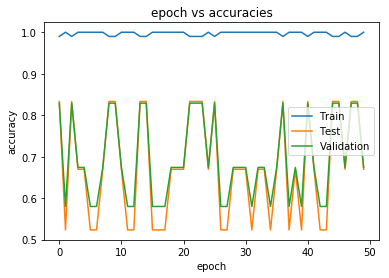

In [94]:
import matplotlib.pyplot as plt
plt.plot(train_accuracy)
plt.plot(test_accuracy)
plt.plot(val_accuracy)
plt.legend(["Train","Test","Validation"])
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("epoch vs accuracies")
plt.show()

In [83]:
#import gensim
#model = gensim.models.KeyedVectors.load_word2vec_format(data, binary=True, limit=500000)

In [84]:
import gensim, logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
Q_train, Q_test, T_train, T_test = train_test_split(sampleQuestions,sampleTopics , test_size=test_split[2], random_state=0)
Q_train, Q_val, T_train, T_val  = train_test_split(Q_train, T_train, test_size=test_split[1], random_state=0)
model = gensim.models.Word2Vec(Q_train, min_count=1)

2018-05-09 16:00:29,035 : INFO : collecting all words and their counts
2018-05-09 16:00:29,036 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2018-05-09 16:00:29,037 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-05-09 16:00:29,047 : INFO : collected 99 word types from a corpus of 68541 raw words and 466 sentences
2018-05-09 16:00:29,049 : INFO : Loading a fresh vocabulary
2018-05-09 16:00:29,050 : INFO : min_count=1 retains 99 unique words (100% of original 99, drops 0)
2018-05-09 16:00:29,051 : INFO : min_count=1 leaves 68541 word corpus (100% of original 68541, drops 0)
2018-05-09 16:00:29,052 : INFO : deleting the raw counts dictionary of 99 items
2018-05-09 16:00:29,053 : INFO : sample=0.001 downsamples 37 most-common words
2018-05-09 16:00:29,054 : INFO : downsampling leaves estimated 16727 word corpus (24.4% of prior 68541)
2018-05-09 16:00:29,055 : INFO : est